## Basic Pandas Examples

This notebook will walk you through some very basic Pandas concepts. We will start with importing typical data science libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Series

Series is like a list or 1D-array, but with index. All operations are index-aligned.

In [9]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","play","games","and","will","not","change"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3      play
4     games
5       and
6      will
7       not
8    change
dtype: object


One of the frequent usage of series is **time series**. In time series, index has a special structure - typically a range of dates or datetimes. We can create such an index with `pd.date_range`.

Suppose we have a series that shows the amount of product bought every day, and we know that every sunday we also need to take one item for ourselves. Here is how to model that using series:

Length of index is 366


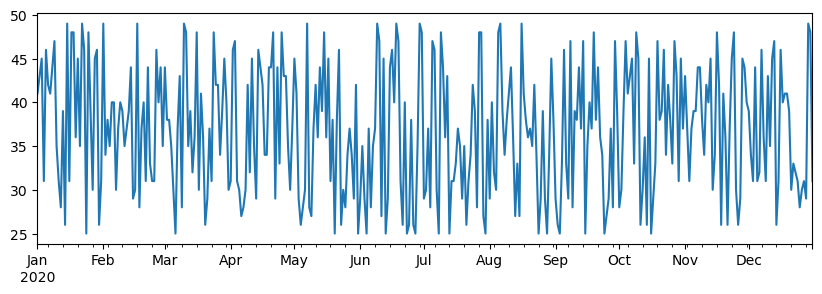

In [38]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [39]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


As you can see, we are having problems here, because in the weekly series non-mentioned days are considered to be missing (`NaN`), and adding `NaN` to a number gives us `NaN`. In order to get correct result, we need to specify `fill_value` when adding series:

2020-01-01    41.0
2020-01-02    43.0
2020-01-03    45.0
2020-01-04    31.0
2020-01-05    66.0
              ... 
2020-12-27    51.0
2020-12-28    29.0
2020-12-29    49.0
2020-12-30    48.0
2020-12-31    31.0
Length: 366, dtype: float64


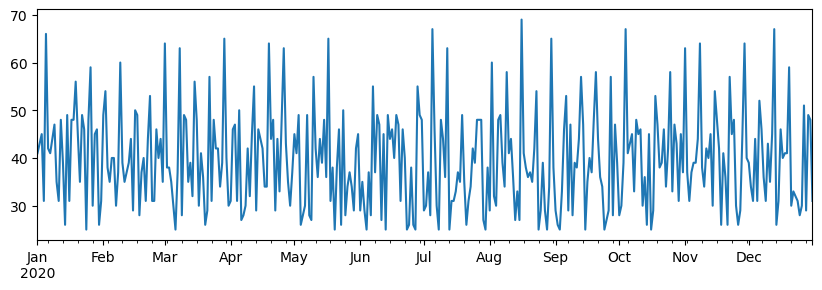

In [45]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

In [29]:
print(additional_items.resample("1d").asfreq(0))

2020-01-05    1
2020-01-06    0
2020-01-07    0
2020-01-08    0
2020-01-09    0
             ..
2020-03-25    0
2020-03-26    0
2020-03-27    0
2020-03-28    0
2020-03-29    1
Freq: D, Length: 85, dtype: int64
